## MLG Sucursales de un banco Australiano

### Oscar Julian Layton

Estos datos, analizados por Weisberg (2005, página 88) y disponibles en el objeto transact del paquete *alr3* de R, corresponden a una muestra de 261 sucursales de un banco australiano de gran tamaño que realiza transacciones de dos tipos. Para cada una de las sucursales en la muestra se registró el número de transacciones de cada tipo (T1 y T2 para las transacciones de los tipos 1 y 2, respectivamente) así como el tiempo total, en minutos, que tarda en tramitarlas (Time). El objetivo del análisis es estimar el tiempo esperado que las sucursales tardan en tramitar el total de las transacciones en función de la cantidad de transacciones de cada tipo.

* **T1:** Hace referencia a transacciones de tipo 1.
* **T2:** Hace referencia a transacciones de tipo 2.
* **Time:** Tiempo en minutos que tarda hacer la transacción k.

A continuación se presentan las primeras 10 observaciones.

In [1]:
require(alr3)
data(transact)
head(transact,n=10)              #primeras 10 observaciones de 394

Loading required package: alr3
Warning message:
"package 'alr3' was built under R version 3.6.2"Loading required package: car
Loading required package: carData


T1,T2,Time
0,1166,2396
0,1656,2348
0,899,2403
516,3315,13518
623,3969,13437
395,3087,7914
408,2925,9111
244,1487,5818
538,4092,12250
0,2798,7300


### A) Descripción de los datos

Considerando que se realizan dos tipos de transacciones en el banco, se puede determinar el siguiente boxplot en el cual se logra identificar que en promedio existen 281 transacciones T1 en las sucursales del banco Ausatraliano, no obstante se puede identificar que existe una sucursal la cual realiza un número máximo de transacciones el cual es de 1450. Además el $50\%$ de las transacciones está entre 85 y 43. No obstante las sucursales que realizan transacciones mayores a $Q3+1.5RI= 437 + 1.5(352)= 965$ pueden considerarse no comunes y son 3.



Loading required package: ggplot2


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    85.0   214.0   281.2   437.0  1450.0 

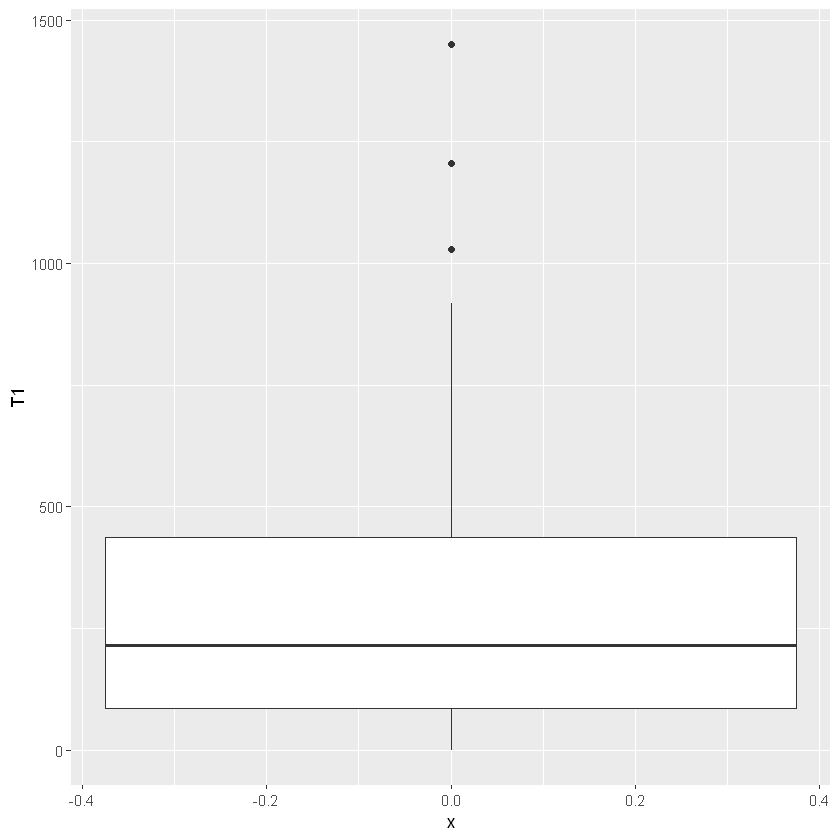

In [2]:
require(ggplot2)
pl <- ggplot(data=transact, aes(x=0, y=T1)) + geom_boxplot();pl
summary(transact$T1)

En lo que tiene que ver con las transacciones T2 se realiza el siguiente boxplot en el cual se puede obsevar que en promedio se generan 2422 en las sucursales del banco, no obstante el $50\%$ de las transacciones tipo 2 está entre 1516 y 3175. En realidad las sucursales que realizan transacciones mayores a  $Q3+1.5RI= 3175 + 1.5(1659)= 5663$ pueden considerarse fuera de lo común y solo es una la cual tiene el número máximo de transacciones con 5791.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    148    1516    2192    2422    3175    5791 

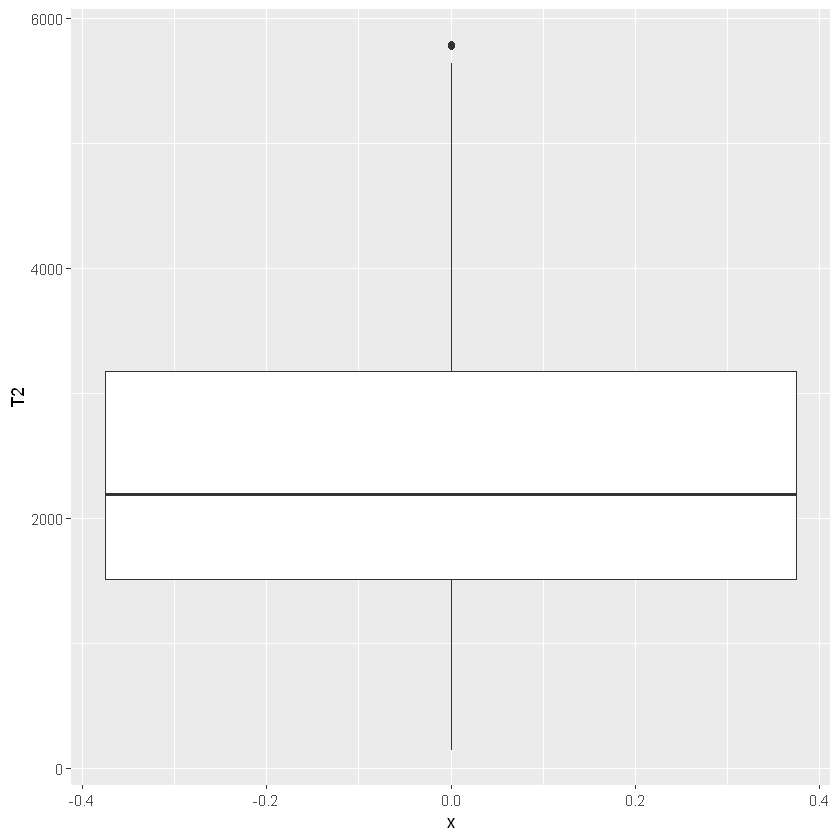

In [3]:
pl2 <- ggplot(data=transact, aes(x=0, y=T2)) + geom_boxplot();pl2
summary(transact$T2)

Lo que tiene que ver con  el tiempo generado al realizar las transacciones se tiene que en promedio las sucursales tardan  6607 minutos.

In [4]:
summary(transact$Time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    487    3618    5583    6607    8712   20741 

### B) Ajuste de modelos

Considerando que la variable de respuesta hace referencia al tiempo **(Time)** en minutos que es una variable de tipo continuo se procede a ajustar modelos con diferentes distribuciones:

## Ajuste Normal

##### Ajuste Normal con función de enlace Identidad


$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Normal(\mu_k, \phi), \\
		 \mu_k= \beta_1 + \beta_2 T1_{k} +  \beta_3 T2_{k}+ \beta_4 T1:T2 \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$
   


In [5]:
fitNormal1 <- glm(Time ~ 1+ T1*T2 ,data = transact, family = gaussian(link="identity"))
#summary(fitNormal1)

#####  Ajuste Normal con función de enlace log

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Normal(\mu_k, \phi), \\
		 log(\mu_k)= \beta_1 + \beta_2 T1_{k} +  \beta_3 T2_{k}+ \beta_4 T1:T2 \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$
   

In [6]:
fitNormal2 <- glm(Time ~ 1+ T1*T2 ,data = transact, family = gaussian(link="log"))
#summary(fitNormal2)

##### Ajuste Normal con función de enlace inversa

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Normal(\mu_k, \phi), \\
		 g^{-1}(\mu_k)= \beta_1 + \beta_2 T1_{k} +  \beta_3 T2_{k}+ \beta_4 T1:T2 \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$
   

In [7]:
fitNormal3 <- glm(Time ~ 1+ T1*T2 ,data = transact, family = gaussian(link="inverse"))
#summary(fitNormal3)

## Ajuste Gama

##### Ajuste Gama con función de enlace Identidad

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Gama(\mu_k, \phi), \\
		 \mu_k=  \beta_1 + \beta_2 T1_{k} +  \beta_3 T2_{k}+ \beta_4 T1:T2 \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$
   

In [8]:
fitGama1 <- glm(Time ~ 1+ T1*T2 ,data = transact, family = Gamma(link="identity"))
#summary(fitGama1)

##### Ajuste Gama con función de enlace log

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Gama(\mu_k, \phi), \\
		 log(\mu_k)=  \beta_1 + \beta_2 T1_{k} +  \beta_3 T2_{k}+ \beta_4 T1:T2 \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [9]:
fitGama2 <- glm(Time ~ 1+ T1*T2 ,data = transact, family = Gamma(link="log"))
#summary(fitGama2)

##### Ajuste Gama con función de enlace inversa

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Gama(\mu_k, \phi), \\
		 g^{-1}(\mu_k)=  \beta_1 + \beta_2 T1_{k} +  \beta_3 T2_{k}+ \beta_4 T1:T2 \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [10]:
fitGama3 <- glm(Time ~ 1+ T1*T2 ,data = transact, family = Gamma(link="inverse"))
#summary(fitGama3)

## Ajuste Normal Inversa

##### Ajuste NI con función de enlace Identidad

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim NI(\mu_k, \phi), \\
		 \mu_k=  \beta_1 + \beta_2 T1_{k} +  \beta_3 T2_{k}+ \beta_4 T1:T2 \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [11]:
fitNI1<- glm(Time ~ 1+ T1*T2 ,data = transact, family = inverse.gaussian(link="identity"))
#summary(fitNI1)

##### Ajuste NI con función de enlace log

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim NI(\mu_k, \phi), \\
		 log(\mu_k)= \beta_1 + \beta_2 T1_{k} +  \beta_3 T2_{k}+ \beta_4 T1:T2 \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [12]:
fitNI2<- glm(Time ~ 1+ T1*T2 ,data = transact, family = inverse.gaussian(link="log"))
#summary(fitNI2)

Warning message:
"glm.fit: algorithm did not converge"

##### Ajuste NI con función de enlace inversa

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim NI(\mu_k, \phi), \\
		 g^{-1}(\mu_k)=  \beta_1 + \beta_2 T1_{k} +  \beta_3 T2_{k}+ \beta_4 T1:T2 \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [13]:
fitNI3<- glm(Time ~ 1+ T1*T2 ,data = transact, family = inverse.gaussian(link="inverse"))
summary(fitNI3)


Call:
glm(formula = Time ~ 1 + T1 * T2, family = inverse.gaussian(link = "inverse"), 
    data = transact)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.035709  -0.001957  -0.000251   0.002078   0.011557  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.527e-04  1.194e-05   37.90   <2e-16 ***
T1          -4.952e-07  3.494e-08  -14.17   <2e-16 ***
T2          -8.844e-08  4.451e-09  -19.87   <2e-16 ***
T1:T2        1.129e-10  9.113e-12   12.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 1.619473e-05)

    Null deviance: 0.0203280  on 260  degrees of freedom
Residual deviance: 0.0069925  on 257  degrees of freedom
AIC: 4751.4

Number of Fisher Scoring iterations: 2


### B) Selección del modelo mediante BIC

En correspondencia a los modelos establecidos, se calcula el BIC:

In [14]:
BIC(fitNormal1,fitNormal2,fitNormal3, fitGama1, fitGama2, fitGama3,fitNI1,fitNI2,fitNI3 )

,df,BIC
fitNormal1,5,4440.679
fitNormal2,5,4473.419
fitNormal3,5,4558.522
fitGama1,5,4340.669
fitGama2,5,4459.558
fitGama3,5,4589.011
fitNI1,5,4408.796
fitNI2,5,4640.116
fitNI3,5,4769.174


Según lo anterior, se puede establecer que el modelo que tiene mejor BIC es **fitGama1** el cual hace referencia a un ajuste Gama con función de enlace identidad. Ahora bien para seleccionar el mejor modelo se usa step_glm con el criterio BIC con procedimiento backward como se muestra en la siguiente línea :

In [15]:
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")
source("macros.txt")

step_glm(fitGama1, criterion="BIC", direction = "backward")   #forward  o  backward


  Family:  Gamma 
    Link:  identity 

Initial model:
Time ~ 1 + T1 + T2 + T1:T2 

Step 0 :    
        Df       BIC       AIC   Deviance+  Pearson^  p-value*
- T1:T2  1   4335.8227 4321.5646    0.9186    0.9099    0.4048
<none>       4340.6686 4322.8460    0.9185    0.9102          

Step 1 :  - T1:T2 
       Df       BIC       AIC   Deviance+  Pearson^  p-value*
<none>      4335.8227 4321.5646    0.9186    0.9099          
- T1    1   4469.4578 4458.7642    0.8623    0.8519    0.0000
- T2    1   4746.0136 4735.3200    0.6086    0.4987    0.0000

+ Adjusted R-squared based on the residual deviance
^ Adjusted R-squared based on the Pearson statistic
* p-value of the Wald test

Final model:
Time ~ 1 + T1 + T2 



El anterior codigo establece el mejor modelo. Se usa el proceso backward (que inicia con el modelo más complejo): 

* **paso 0**: Si se quita la interacción doble _T1*T2_ se tendría un BIC=4335.8 el cual es mucho menor que el bic de los demás efectos principales. **CONCLUSIÓN: Sacar la interacción doble del modelo**.

* **paso 1**: Según las indicaciones del procedimiento se sugiere  no hacer nada más, es decir _none_ tendría el BIC=4335.8  mucho menor que el bic de los demás efectos principales. **CONCLUSIÓN: No quitar más efectos**.

Obteniéndose el siguiente predictor lineal: 


$$\eta \sim 1 + T1 + T2 $$

cuyo ajuste es:

In [16]:
ajustefinal<- glm(Time ~ 1+ T1 + T2 ,data = transact, family = Gamma(link="identity"))
summary(ajustefinal)


Call:
glm(formula = Time ~ 1 + T1 + T2, family = Gamma(link = "identity"), 
    data = transact)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.46866  -0.10718   0.00159   0.08656   0.67933  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 152.95135   51.79999   2.953  0.00344 ** 
T1            5.70559    0.42561  13.406  < 2e-16 ***
T2            2.00712    0.05799  34.612  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.02938704)

    Null deviance: 92.603  on 260  degrees of freedom
Residual deviance:  7.477  on 258  degrees of freedom
AIC: 4321.6

Number of Fisher Scoring iterations: 4


La anterior salida especifica la estimación de los parámetros a partir de 4 iteraciones del scoring de fisher.

### C) test de wald y razón de verosimilitudes

#### Test de WALD

En correspondencia al modelo anterior modelo propuesto surge una pregunta alusiva a si _¿existe evidencia estadísticamente significativa en que el efecto del peso del vehículo sobre su rendimiento esperado depende de la potencia del motor?_ Para responder esta pregunta se realiza el siguiente contraste de hipótesis:


$$H_{0}: \beta_2=0 \;\;\;\;\; vs \;\;\;\;\;\;H_{1}: \beta_2 \neq 0 $$

donde 

$$ \xi _{W} = (\hat{\beta_2}  - \beta_2^{0})' [\hat{Var}(\hat{\beta_2})]^{-1}(\hat{\beta_2}  - \beta_2^{0})$$


In [17]:
(coef(ajustefinal)[c(2)])^2 /(vcov(ajustefinal)[c(2), c(2)])     #test de wald

T1 
179.7094

Aqui hay que notar que $\xi _{W}= 179$ es el mismo test de wald para el casi univariado, vease la salida presentada en _summary(ajustefinal)_ Dese cuenta que $\xi _{W}= 179$ que este valor es el que hay que comparar con una $\chi ^2 $ con un grado de libertad, 1df, concluyendose que hay evidencia para rechazar la hipótesis nula, al igual que especifica la salida _summary(ajustefinal)_ en su $p-valor=2e^{-16}$. Finalmente **el efecto del peso del vehículo sobre su rendimiento esperado  SI depende de la potencia del motor.**

#### Otra forma del test de wald

In [18]:
fit<- glm(Time ~ 1+ T1  ,data = transact, family = Gamma(link="identity"))
anova_glm(ajustefinal,fit,test="wald") #test de wald


  Wald test 

 Model 1:  Time ~ 1 + T1 + T2 
 Model 2:  Time ~ 1 + T1 

  Chi   Df  Pr(>Chi)    
   1198  1 < 2.2e-16 ***


Con el código anterior también se llega a la misma conclusión anterior. **el efecto del peso del vehículo sobre su rendimiento esperado  SI depende de la potencia del motor.**

#### Test razón de verosimilitudes

_¿existe evidencia estadísticamente significativa en que el efecto del peso del vehículo sobre su rendimiento esperado depende de la potencia del motor?_ Para responder esta pregunta se realiza el siguiente contraste de hipótesis:

$$H_{0}: \beta_2=0 \;\;\;\;\; vs \;\;\;\;\;\;H_{1}: \beta_2 \neq 0 $$

Consideradndo el siguiente código se rechaza $H_0$ a un nivel de significancia APROXIMADO del 100$ \alpha\%$ puesto que $\xi _{RV}=974.25 >\chi^2(1)$ A firmandose que $\beta_2$ es significativo en el modelo. Es decír **el efecto del peso del vehículo sobre su rendimiento esperado  SI depende de la potencia del motor.**

In [19]:
anova_glm(ajustefinal,fit, test = "LRT")  


  Likelihood-ratio test 

 Model 1:  Time ~ 1 + T1 + T2 
 Model 2:  Time ~ 1 + T1 

   Chi   Df  Pr(>Chi)    
  974.25  1 < 2.2e-16 ***


### D) Análsis del diagnóstico del modelo

La siguiente gráfica es la de los residuos cuantil, mediante la función **residuals_glm()** la cual genera por defecto los residuos cuantil.

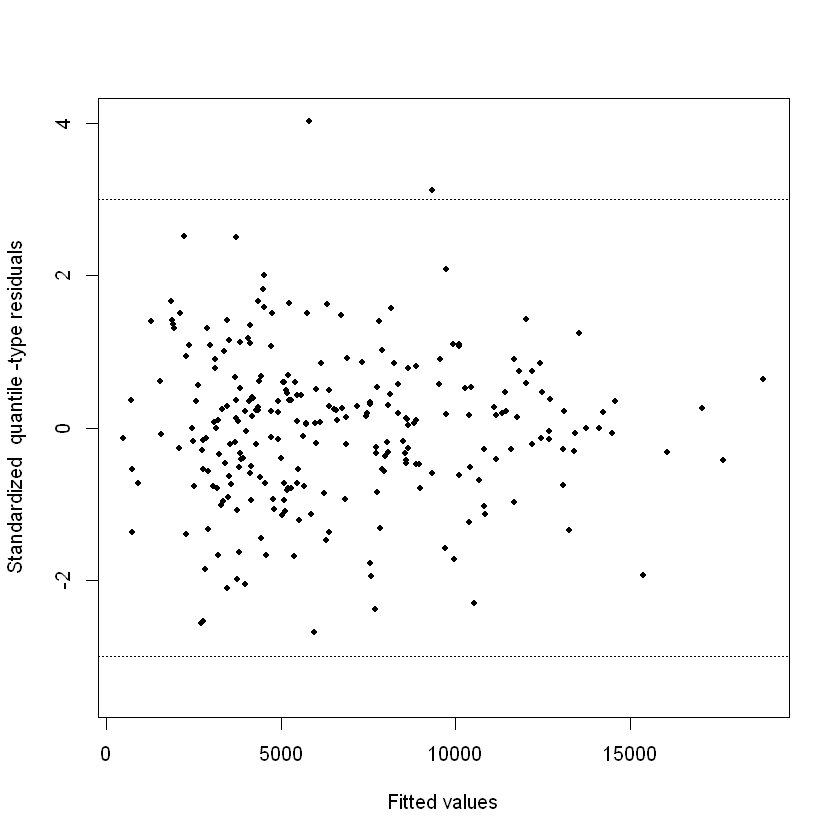

In [20]:
residuals_glm(ajustefinal,identify = 5)

Los corresponsales bancarios que tienen altos residuos son (64,161,169) y menor residuo el auto 158.

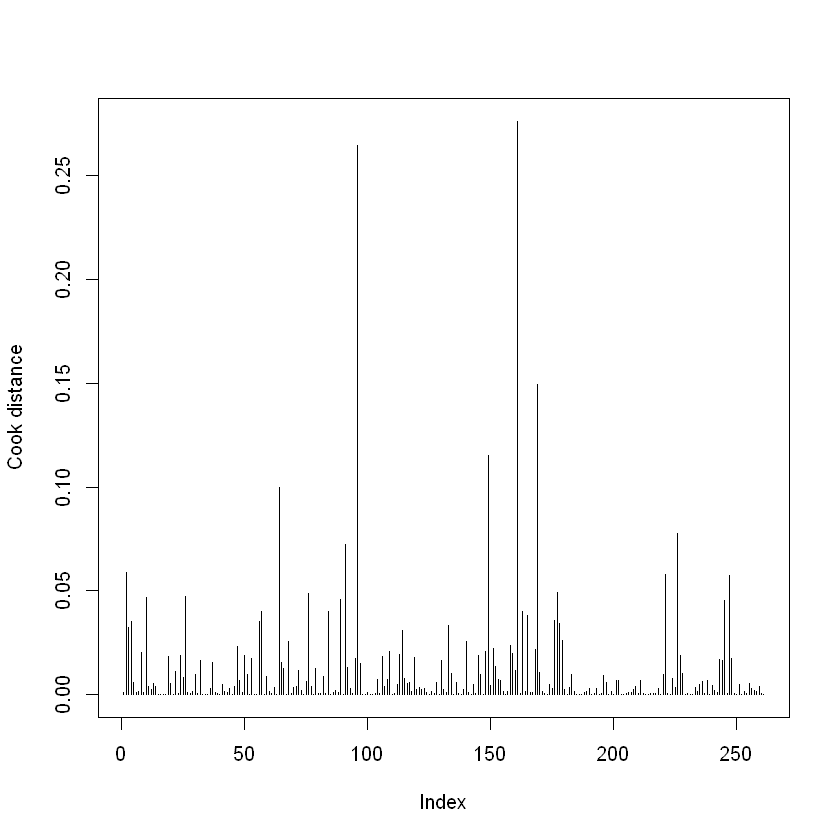

In [21]:
Cookdis_glm(ajustefinal,identify = 5)  

Las sucursles que aproximadamente tienen más alta distancia de cook son (96,161,169,149,64)

 (64,161,169) y menor residuo el auto 158.

### ¿Qué sucede si quitamos los puntos alto leverage?

Quitando el dato 64 se tiene:

In [22]:
case.deletion_glm(ajustefinal,subset = c(-64))


            Estimate  Std. Error   Pr(>|t|)  | Estimate* Std. Error*  Pr(>|t|)*
(Intercept) 152.95135    51.79999    0.00344 | 156.94716    49.65571    0.00176
T1            5.70559     0.42561    0.00000 |   5.69857     0.40597    0.00000
T2            2.00712     0.05799    0.00000 |   1.99692     0.05541    0.00000
            | Change(%)
(Intercept) |    2.6125
T1          |   -0.1229
T2          |   -0.5083

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.


* Quitando el dato 64 se tiene que **(Continúa el signo y la significancia)**

La estimación del intercepto aumentó un $2\%$, mientras que la estimación de $\beta_2$ y $\beta_3$ no tienen cambios significativos, al quitar la observación 64 indica que las cosas siguen siendo prácticamente iguales con respecto a la significancia.

In [23]:
case.deletion_glm(ajustefinal,subset = c(-161))


            Estimate  Std. Error   Pr(>|t|)  | Estimate* Std. Error*  Pr(>|t|)*
(Intercept) 152.95135    51.79999    0.00344 | 167.54288    51.48255    0.00129
T1            5.70559     0.42561    0.00000 |   5.87698     0.41797    0.00000
T2            2.00712     0.05799    0.00000 |   1.97613     0.05725    0.00000
            | Change(%)
(Intercept) |     9.540
T1          |     3.004
T2          |    -1.544

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.


* Quitando el dato 161 se tiene que **(Continúa el signo y la significancia)**

La estimación del intercepto aumentó un $9\%$, asi mismo la estimación de $\beta_2$ aumentó $3\%$ todo al quitar la observación 161. No obstante la significancia permaneció igual.

In [24]:
case.deletion_glm(ajustefinal,subset = c(-169))


            Estimate  Std. Error   Pr(>|t|)  | Estimate* Std. Error*  Pr(>|t|)*
(Intercept) 152.95135    51.79999    0.00344 | 138.09967    50.51760    0.00670
T1            5.70559     0.42561    0.00000 |   5.58624     0.42171    0.00000
T2            2.00712     0.05799    0.00000 |   2.02214     0.05727    0.00000
            | Change(%)
(Intercept) |    -9.710
T1          |    -2.092
T2          |     0.748

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.


* Quitando el dato 169 se tiene que **(Continúa el signo y la significancia)**

La estimación del intercepto disminuyo un $9\%$, asi mismo la estimación de $\beta_2$ disminuyo pero en un $2\%$ todo al quitar la observación 169.

In [25]:
case.deletion_glm(ajustefinal,subset = c(-96))


            Estimate  Std. Error   Pr(>|t|)  | Estimate* Std. Error*  Pr(>|t|)*
(Intercept) 152.95135    51.79999    0.00344 | 180.87349    57.05507    0.00171
T1            5.70559     0.42561    0.00000 |   5.75698     0.42691    0.00000
T2            2.00712     0.05799    0.00000 |   1.98841     0.05997    0.00000
            | Change(%)
(Intercept) |    18.256
T1          |     0.901
T2          |    -0.932

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.


* Quitando el dato 96 se tiene que **(Continúa el signo y la significancia)**

La estimación del intercepto aumentó un $18\%$, la estimación de $\beta_2$ aumentó poco. No obstante la significancia permaneció igual.

### Envelope

En cosideración al modelo descrito se tiene el envelope con respecto a los residuos cuantil:

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


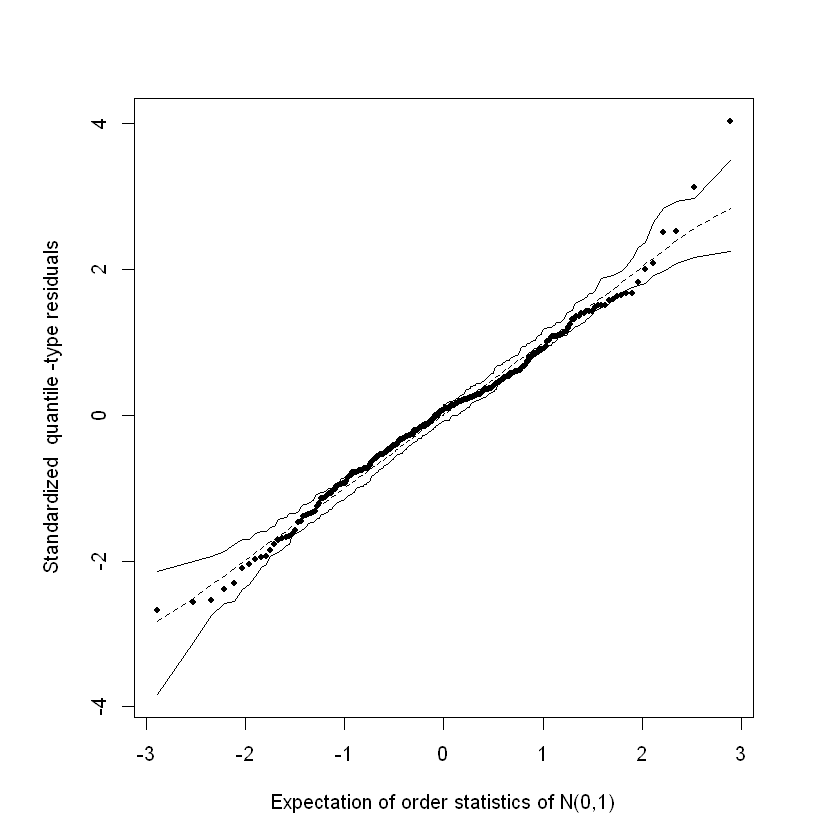

In [26]:
envelope_glm(ajustefinal)

### supuesto de dispersión constante


La homocedasticidad, es una característica de un modelo de regresión lineal que implica que la varianza de los errores es constante a lo largo del tiempo. Supongase el *modelo gamma heterocedastico* descrito por:

$\;$
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           Y_k = \mu_k + \epsilon_k\\
		 \mu_k=\mathbf{x}_k'\beta  \\
		 Y_k \sim Gama(\mu_k, \phi_k)\\
         log(\phi_k) =\vartheta_1 + Z_k \vartheta 
	       \end{array}
	     \right.
   \end{equation*}
   $$
  
  
 Tengase en cuenta $\Theta_{(p+q)}$ de dimensión (p+q) donde: $\Theta= \left ( \beta ^r , \vartheta _1, \vartheta ^T \right )^T$ con $\beta$ de dimensión p, $\vartheta _1$ de dimensión 1 y $\vartheta ^T$ de dimensión q-1.
 
La forma de proceder está en contrastar la siguiente hipótesis:

$$H_{0}: \vartheta =0\;\;\;\;\;\;\;\;vs \;\;\;\; \;\;\;\;H_{1}: \vartheta \neq  0$$
 
 
 
#####  Test de Score o Rao  (necesita 1 parámetro a estimar $\widehat{\theta}^{(0)}$ )

$$\zeta_{s}=\left \{   [U_{\vartheta}(\theta)]^{T}Var(\widehat{\vartheta})[U_{\vartheta}(\theta)]   \right \} |_{\theta=\widehat{\theta}^{(0)}}  \;\;\;\;\;\;\; ; \;\;\;\;\;\;\; \zeta_{s}\; \overset{H_0}{\underset{n \to \infty }{\sim}} \; \chi^2_{(q-1)} $$

Aquí $U(\theta)= \bigtriangledown l(\theta)$ es el vector gradiente y $U_{\vartheta}(\theta)$ los últimos (q-1) valores del vector gradiente.



In [27]:
vdtest(ajustefinal)
bptest(ajustefinal,studentize=FALSE)


             Score test for varying dispersion

          Statistic =  8.25206 
 degrees of freedom =  2 
            p-value =  0.016147 



ERROR: Error in bptest(ajustefinal, studentize = FALSE): no se pudo encontrar la función "bptest"


# Interepretación de los parámetros

Considerando que el modelo propuesto (Normal inversa con función de enlace identidad) sigue los supuestos anteriormente especificados, se tiene:

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim NI(\mu_k, \phi), \\
		 \mu_k=  \beta_1 + \beta_2 T1_{k} +  \beta_3 T2_{k} \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$


**Interpretación del efecto de T1 ($\beta_2$)**

* Al comparar dos sucursales con el mismo número de transacciones T2, por cada unidad adicional transacciones tipo 1 el tiempo esperado aumenta  5.7 unidades

**Interpretación del efecto de T2 ($\beta_3$)**

* Si se comparan dos sucursales con el mismo numero de transacciones tipo 1 pero donde una sucursal tiene una unidad adicional en transaciones T2, entonces el tiempo esperado en realizar T2 de la mayor es, aproximadamente 2.00 minutos mayor que en la menor. 